# Setup

## NOTE:  Consider renaming or deleting prior performance results (time_csv_results.csv and time_parquet_results.csv).

In [1]:
# imports
from IPython.display import display, HTML
from pathlib import Path

import gzip

# graphing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import shutil

%matplotlib inline

In [2]:
# generate synthetic data for performance testsing
!python -m synthetic_data

Test data exists in multiple formats.


In [3]:
# data paths
data_path = Path("data")

# list paths for data here for convenience
data_csv = Path("data", "python_dev_universe.csv")
data_csv_gz = Path(data_path, "python_dev_universe.csv.gz")
data_parquet = Path("data", "python_dev_universe.parquet")

In [4]:
# logfile name
log_filename = "time_csv_results.iter_30.csv"

# Write functions to test elapsed time for multiple configurations - done manually to illustrate different combinations of parameters

## Pandas functions - more kwarg options

In [5]:
from log_timer_results import log_to_csv


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_default(datafile=data_csv):
    df = pd.read_csv(datafile)
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_gz(datafile=data_csv):
    df = pd.read_csv(data_csv_gz, compression="gzip")  # NOTE: gzipped file here
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_c(datafile=data_csv):
    df = pd.read_csv(datafile, engine="c")
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_python(datafile=data_csv):
    df = pd.read_csv(datafile, engine="python")
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_default_dtype_numpy(datafile=data_csv):
    df = pd.read_csv(datafile, dtype_backend="numpy_nullable")
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine__c_dtype_numpy(datafile=data_csv):
    df = pd.read_csv(datafile, engine="c", dtype_backend="numpy_nullable")
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_python__dtype_numpy(datafile=data_csv):
    df = pd.read_csv(datafile, engine="python", dtype_backend="numpy_nullable")
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_pyarrow(datafile=data_csv):
    df = pd.read_csv(datafile, engine="pyarrow")
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_pyarrow_dtype_numpy(datafile=data_csv):
    df = pd.read_csv(datafile, engine="pyarrow", dtype_backend="numpy_nullable")
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_pyarrow_dtype_pyarrow(datafile=data_csv):
    df = pd.read_csv(datafile, engine="pyarrow", dtype_backend="pyarrow")
    # print(df.head(1))
    return True


@log_to_csv(
    log_filename="time_parquet_results.csv", buffer_size=10, flush_on_return=True
)
def pandas_read_parquet(datafile=data_parquet):
    df = pd.read_parquet(datafile)
    # print(df.head(1))
    return True

## Polars options

In [6]:
@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def polars_read_csv(datafile=data_csv):
    df = pl.read_csv(source=datafile)
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def polars_read_csv_singlethread(datafile=data_csv):
    df = pl.read_csv(source=datafile, n_threads=1)
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def polars_read_csv_gz(datafile=data_csv_gz):
    df = pl.read_csv(data_csv_gz)  # NOTE: gzipped file here
    # print(df.head(1))
    return True


@log_to_csv(log_filename=log_filename, buffer_size=10, flush_on_return=True)
def polars_read_parquet(datafile=data_parquet):
    df = pl.read_parquet(source=datafile)
    # print(df.head(1))
    return True

# test pandas/polars read CSV and compressed CSV

In [5]:
data_csv_gz = Path("data", "python_dev_universe.csv.gz")
df_pandas = pd.read_csv(data_csv_gz, compression="gzip")

In [6]:
df_pandas.head(2)

,customer_id,age,their_lucky_number,occupation,psf_membership_status,education,date_started_python
0,A43321819,47,0,Data Engineer,Contributing,High School,1924-07-20
1,001338908,37,0,Rustacean,Managing,High School,2004-03-09


In [7]:
df_polars = pl.read_csv(source=data_csv_gz)

In [8]:
df_polars.head(2)

customer_id,age,their_lucky_number,occupation,psf_membership_status,education,date_started_python
str,i64,i64,str,str,str,str
"""A43321819""",47,0,"""Data Engineer""","""Contributing""","""High School""","""1924-07-20"""
"""001338908""",37,0,"""Rustacean""","""Managing""","""High School""","""2004-03-09"""


# Quick result - run each read function once

In [10]:
# read csv with a variety of configs
pandas_read_csv_default()
pandas_read_csv_engine_c()
pandas_read_csv_engine_python()
pandas_read_csv_default_dtype_numpy()
pandas_read_csv_engine__c_dtype_numpy()
pandas_read_csv_engine_python__dtype_numpy()
pandas_read_csv_engine_pyarrow()
pandas_read_csv_engine_pyarrow_dtype_numpy()
pandas_read_csv_engine_pyarrow_dtype_pyarrow()

# polars
polars_read_csv_singlethread()
polars_read_csv()

# reading compressed files
pandas_read_csv_gz()
polars_read_csv_gz()

# read parquet tiles
pandas_read_parquet()
polars_read_parquet()

  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_default
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_engine_c
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_engine_python
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education 

True

In [11]:
df_csv_results = pd.read_csv(
    log_filename, header=0, engine="pyarrow", dtype_backend="pyarrow"
)
df_csv_results

,function_name,elapsed_time,iteration
0,pandas_read_csv_default,53.437651,0
1,pandas_read_csv_engine_c,53.734491,0
2,pandas_read_csv_engine_python,293.715470,0
3,pandas_read_csv_default_dtype_numpy,66.816411,0
4,pandas_read_csv_engine__c_dtype_numpy,52.998411,0
5,pandas_read_csv_engine_python__dtype_numpy,242.125103,0
6,pandas_read_csv_engine_pyarrow,21.914674,0
7,pandas_read_csv_engine_pyarrow_dtype_numpy,25.400352,0
8,pandas_read_csv_engine_pyarrow_dtype_pyarrow,4.006117,0
9,polars_read_csv_singlethread,8.227495,0


<Axes: xlabel='function_name'>

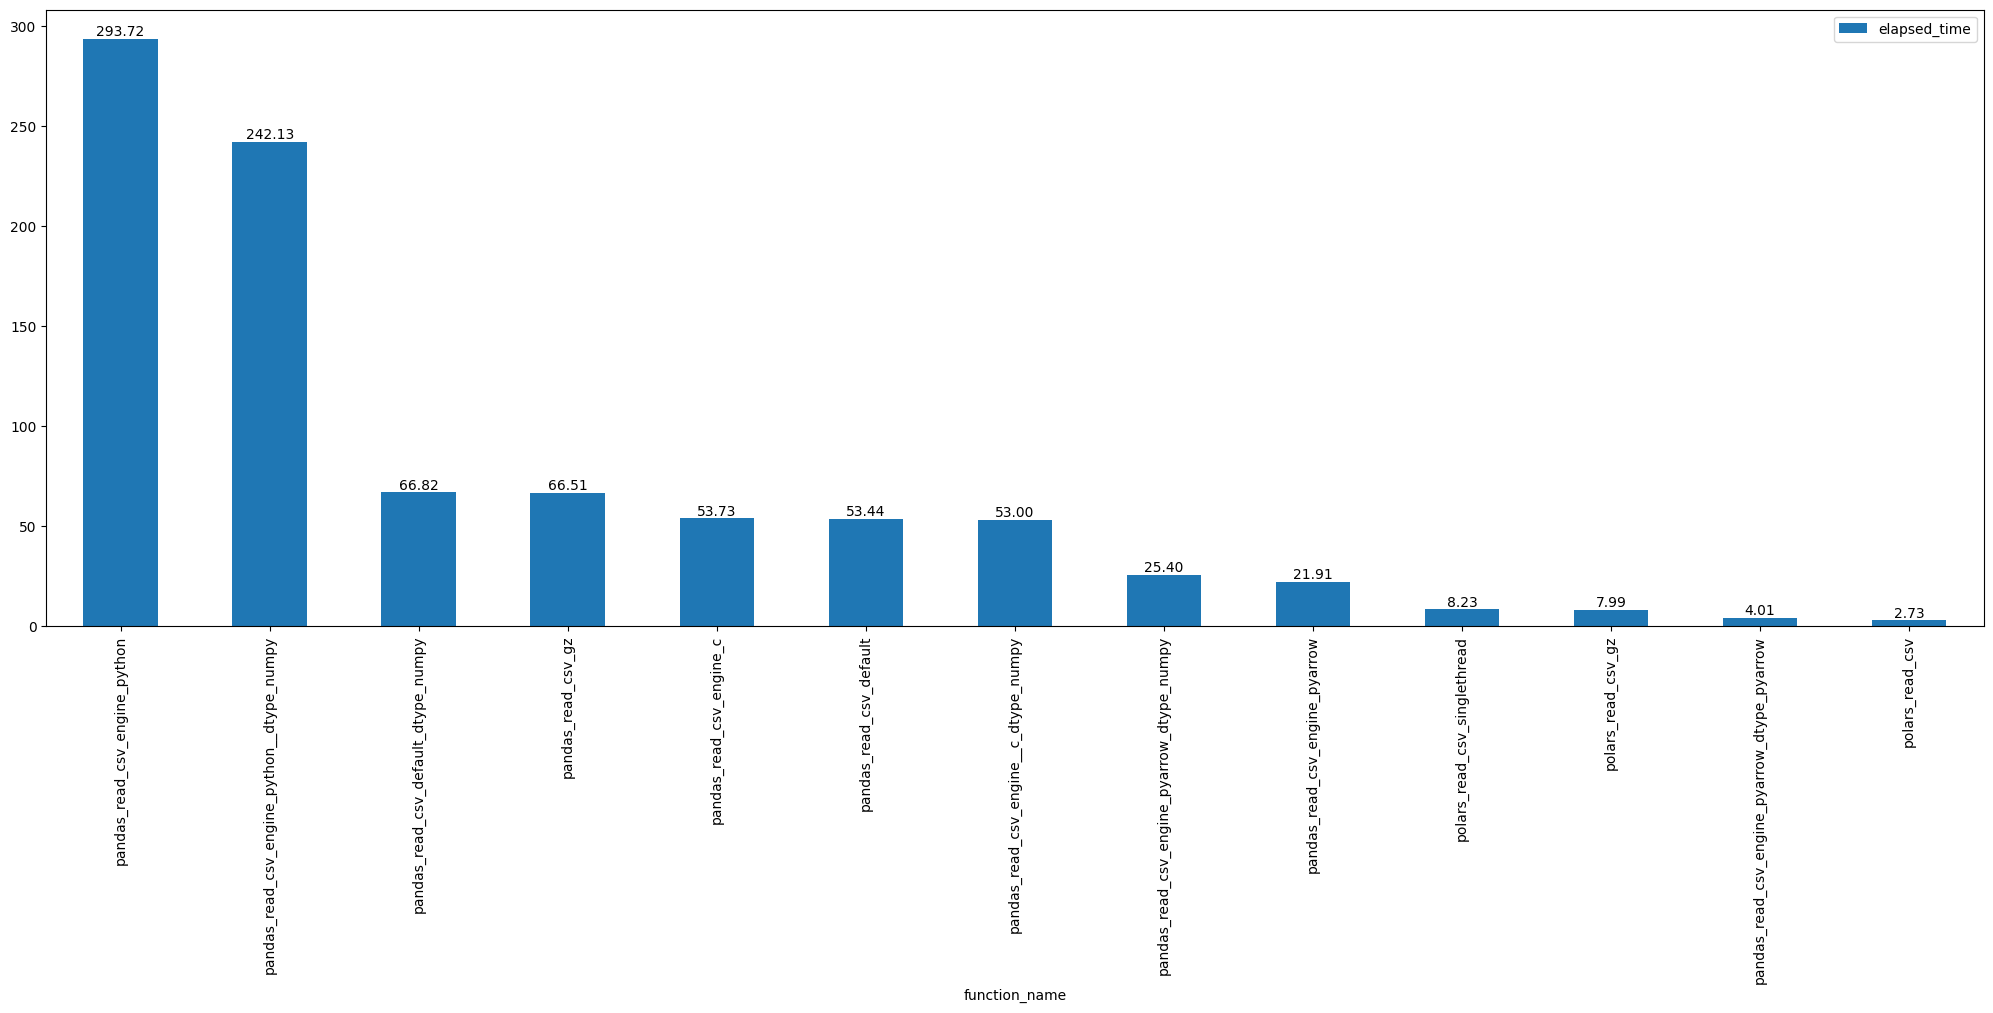

In [12]:
# graph results - csv
ax_csv = df_csv_results.sort_values(
    ["elapsed_time", "function_name"], ascending=[False, True]
).plot(kind="bar", x="function_name", y="elapsed_time", figsize=(25, 8))
ax_csv.bar_label(ax_csv.containers[0], fmt="%.2f")
ax_csv

In [13]:
pd.options.future.infer_string = True

In [14]:
# re-run csv tests
# read csv with a variety of configs
pandas_read_csv_default()
pandas_read_csv_engine_c()
pandas_read_csv_engine_python()
pandas_read_csv_default_dtype_numpy()
pandas_read_csv_engine__c_dtype_numpy()
pandas_read_csv_engine_python__dtype_numpy()
pandas_read_csv_engine_pyarrow()
pandas_read_csv_engine_pyarrow_dtype_numpy()
pandas_read_csv_engine_pyarrow_dtype_pyarrow()

# reading compressed files
pandas_read_csv_gz()

  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_default
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_engine_c
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_engine_python
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education 

True

In [40]:
# re-read datafile and repeat plot
old_time_csv_results = pd.read_csv(
    "old_time_csv_results.csv", header=0, engine="pyarrow", dtype_backend="pyarrow"
)
old_time_csv_results

,function_name,elapsed_time,iteration
0,pandas_read_csv_default,50.754199,0
1,pandas_read_csv_engine_c,50.454714,0
2,pandas_read_csv_engine_python,256.138989,0
3,pandas_read_csv_default_dtype_numpy,60.678965,0
4,pandas_read_csv_engine__c_dtype_numpy,53.267463,0
5,pandas_read_csv_engine_python__dtype_numpy,239.646672,0
6,pandas_read_csv_engine_pyarrow,22.002287,0
7,pandas_read_csv_engine_pyarrow_dtype_numpy,24.820781,0
8,pandas_read_csv_engine_pyarrow_dtype_pyarrow,4.607117,0
9,polars_read_csv_singlethread,8.385164,0


In [41]:
# re-read datafile and repeat plot
df_read_results_iter_30 = pd.read_csv(
    "time_read_results_iter_30.csv", header=0, engine="pyarrow", dtype_backend="pyarrow"
)
df_read_results_iter_30 = df_read_results_iter_30.sort_values(
    by=["function_name", "iteration"], ascending=True
)
df_read_results_iter_30

,function_name,elapsed_time,iteration
0,pandas_read_csv_default,50.910678,0
1,pandas_read_csv_default,51.065809,1
2,pandas_read_csv_default,52.746639,2
3,pandas_read_csv_default,50.089966,3
4,pandas_read_csv_default,49.795622,4
...,...,...,...
445,polars_read_parquet,2.865528,25
446,polars_read_parquet,2.898648,26
447,polars_read_parquet,2.959308,27
448,polars_read_parquet,2.727753,28


In [42]:
# cleanup any outliers
def replace_outliers(group):
    """identify outliers and replace elapsed_time with the median value when grouped by function_name"""
    q1 = group["elapsed_time"].quantile(0.25)
    q3 = group["elapsed_time"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find outliers
    outliers = group[
        (group["elapsed_time"] < lower_bound) | (group["elapsed_time"] > upper_bound)
    ]
    # Store outliers in df_outliers
    global df_outliers
    df_outliers = pd.concat([df_outliers, outliers])

    # Replace outliers with the median value in the original DataFrame
    median_value = group["elapsed_time"].median()
    group.loc[
        (group["elapsed_time"] < lower_bound) | (group["elapsed_time"] > upper_bound),
        "elapsed_time",
    ] = median_value
    return group


# Initialize df_outliers
df_outliers = pd.DataFrame(columns=df_read_results_iter_30.columns)

# Apply the function to each group
df_read_results_iter_30 = (
    df_read_results_iter_30.groupby("function_name")
    .apply(replace_outliers)
    .reset_index(drop=True)
)

# review
df_outliers.head(10)

/tmp/ipykernel_6216/4042776921.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_outliers = pd.concat([df_outliers, outliers])


,function_name,elapsed_time,iteration
0,pandas_read_csv_default,50.910678,0
1,pandas_read_csv_default,51.065809,1
2,pandas_read_csv_default,52.746639,2
21,pandas_read_csv_default,52.936202,21
90,pandas_read_csv_default_dtype_numpy,55.208901,0
91,pandas_read_csv_default_dtype_numpy,57.103071,1
131,pandas_read_csv_engine__c_dtype_numpy,51.932801,11
149,pandas_read_csv_engine__c_dtype_numpy,52.819732,29
39,pandas_read_csv_engine_c,49.850791,9
57,pandas_read_csv_engine_c,49.858435,27


In [43]:
df_read_results_iter_30.head(45);

In [44]:
# Group by function_name and compute the median elapsed_time for each group
df_read_iter_30_summary = (
    df_read_results_iter_30.groupby("function_name")["elapsed_time"]
    .median()
    .reset_index()
)

# Rename time column to median_elapsed_time
df_read_iter_30_summary.rename(
    columns={"elapsed_time": "median_elapsed_time"}, inplace=True
)

# assign some groups to arrange the graph downstream in a logical way for the reader
df_read_iter_30_summary["group"] = 0
df_read_iter_30_summary.loc[
    df_read_iter_30_summary["function_name"].isin(
        ["pandas_read_csv_default", "polars_read_csv"]
    ),
    "group",
] = 1
df_read_iter_30_summary.loc[
    df_read_iter_30_summary["function_name"].isin(
        ["pandas_read_csv_engine_pyarrow_dtype_numpy"]
    ),
    "group",
] = 2
df_read_iter_30_summary.loc[
    df_read_iter_30_summary["function_name"].isin(
        ["pandas_read_csv_engine_pyarrow_dtype_pyarrow", "polars_read_csv"]
    ),
    "group",
] = 3
df_read_iter_30_summary.loc[
    df_read_iter_30_summary["function_name"].isin(
        ["pandas_read_parquet", "polars_read_parquet"]
    ),
    "group",
] = 4


df_read_iter_30_summary = df_read_iter_30_summary.sort_values(
    by=["group", "median_elapsed_time", "function_name"], ascending=[True, False, True]
).reset_index()

df_read_iter_30_summary.head(5)

,index,function_name,median_elapsed_time,group
0,7,pandas_read_csv_engine_python,238.266773,0
1,8,pandas_read_csv_engine_python__dtype_numpy,236.708205,0
2,9,pandas_read_csv_gz,58.658859,0
3,2,pandas_read_csv_engine__c_dtype_numpy,49.949293,0
4,1,pandas_read_csv_default_dtype_numpy,49.925280,0


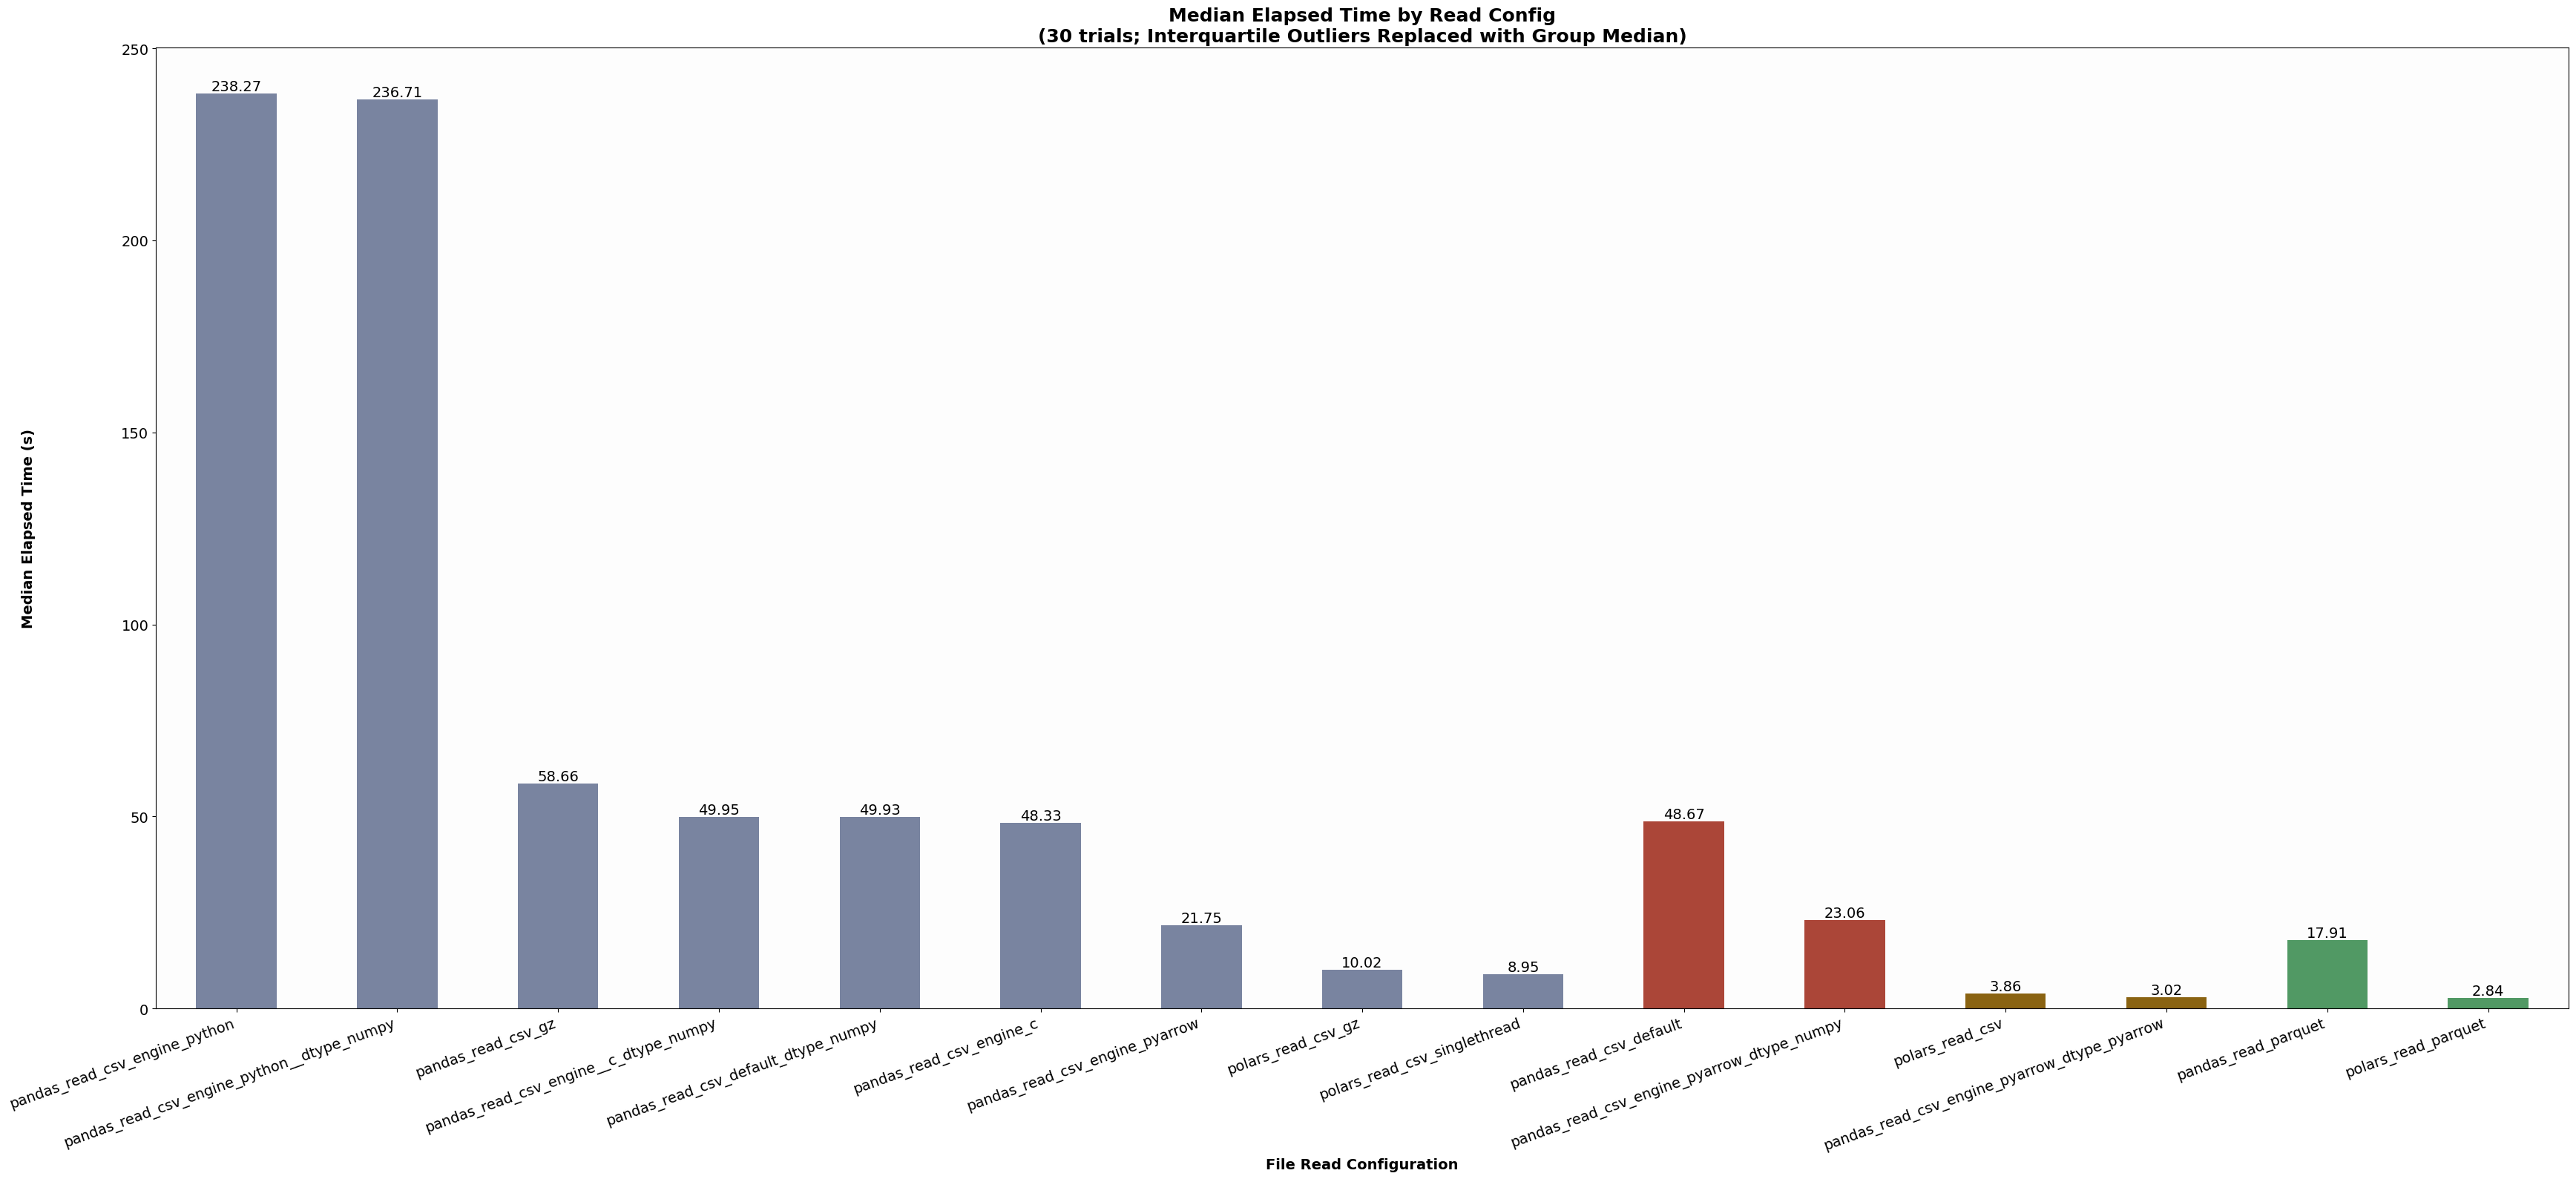

In [115]:
# Define the color mapping
color_mapping = {
    "pandas_read_csv_default": "#AB4638",
    "pandas_read_csv_engine_pyarrow_dtype_numpy": "#AB4638",
    "polars_read_csv": "#8A6312",
    "pandas_read_csv_engine_pyarrow_dtype_pyarrow": "#8A6312",
    "pandas_read_parquet": "#519964",
    "polars_read_parquet": "#519964",
}

# Sort and create the bar plot
ax_read_speeds_median = df_read_iter_30_summary.sort_values(
    ["group", "median_elapsed_time", "function_name"], ascending=[True, False, True]
).plot(
    kind="bar",
    x="function_name",
    y="median_elapsed_time",
    figsize=(35, 16),
    legend=None,
    color=[
        color_mapping.get(x, "#7984A0")
        for x in df_read_iter_30_summary["function_name"]
    ],
)

# Add title, datapoint labels and some color
ax_read_speeds_median.set_title(
    "Median Elapsed Time by Read Config\n(30 trials; Interquartile Outliers Replaced with Group Median)",
    fontsize=18,
    weight="bold",
)
ax_read_speeds_median.set_facecolor("#f0f0f0" + "20")
ax_read_speeds_median.bar_label(
    ax_read_speeds_median.containers[0], fmt="%.2f", fontsize=14
)

# More readable axis labels
ax_read_speeds_median.set_xticklabels(
    ax_read_speeds_median.get_xticklabels(), rotation=20, ha="right"
)
ax_read_speeds_median.set_xlabel("File Read Configuration", fontsize=14, weight="bold")
ax_read_speeds_median.set_ylabel("Median Elapsed Time (s)", fontsize=14, weight="bold")
ax_read_speeds_median.yaxis.set_label_coords(-0.05, 0.5)
ax_read_speeds_median.tick_params(axis="both", which="major", labelsize=14)
plt.tight_layout()

plt.savefig(
    "./images/csv_read_speed_comparison_30_iter.jpg", dpi=100
)  # Adjust dpi to get the desired resolution
plt.show()

In [85]:
# save graph to file:
# Convert pixel width to inches (matplotlib's default), assuming a resolution of 100 DPI
width_in_inches = 1000 / 100  # 1000 pixels / 100 DPI
height_in_inches = width_in_inches * (8 / 25)  # Maintain the aspect ratio of 25:8

# Set the figure size
# fig = plt.gcf()
# fig.set_size_inches(width_in_inches, height_in_inches)
plt.figure(figsize=(15, 8))
# Save the figure
plt.savefig(
    "./images/csv_read_speed_comparison_30_iter.jpg", dpi=100
)  # Adjust dpi to get the desired resolution
# plt.close(fig)  # Close the plot to free up memory
plt.show()

<Figure size 1500x800 with 0 Axes>

# Read Parquet files

In [17]:
df_parquet_results = pd.read_csv(
    "time_parquet_results.csv", header=0, engine="pyarrow", dtype_backend="pyarrow"
)
df_parquet_results

,function_name,elapsed_time,iteration
0,pandas_read_parquet,23.754931,0
1,polars_read_parquet,2.275835,0


<Axes: xlabel='function_name'>

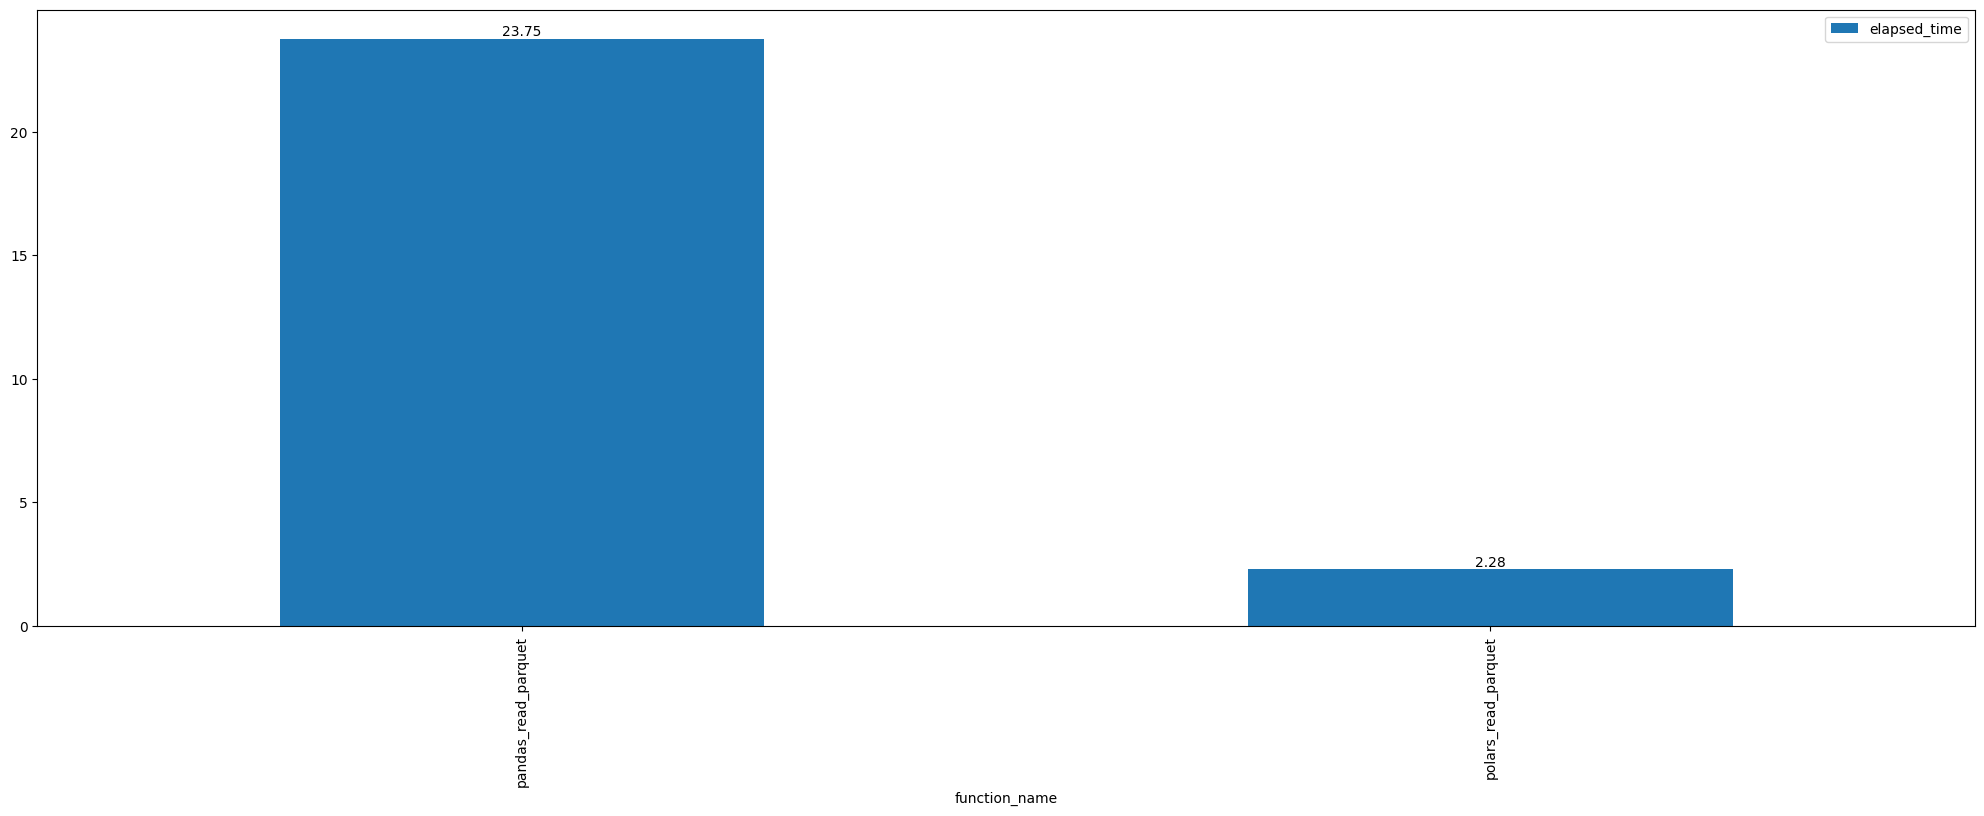

In [18]:
# graph results - csv
ax_parquet = df_parquet_results.sort_values(
    ["elapsed_time", "function_name"], ascending=[False, True]
).plot(kind="bar", x="function_name", y="elapsed_time", figsize=(25, 8))
ax_parquet.bar_label(ax_parquet.containers[0], fmt="%.2f")
ax_parquet

# slower, but more complete result 
## run each function multiple times, then average the result in a dataframe and graph it

## note - cells below set as `raw` in jupyter to avoid long runtimes; change to `code` and run the notebook again

In [7]:
# helper function to iterate on each function multiple times
def run_with_iterations(func, datafile, **kwargs):
    num_iterations = kwargs.get("num_iterations", 1)
    for idx in range(num_iterations):
        func(datafile=datafile, iteration=idx)

In [10]:
# run multiple iterations of all functions
# WARNING -- this code make take a while; we want it to run single-threaded and not in a multiprocessing pool to get clean measurements of each read config.
# NOTE - this may die when run in jupyter which doesn't love long-running processese, just run from terminal if need to rebenchmark the data

num_iterations = 30
# read csv with a variety of configs
run_with_iterations(
    pandas_read_csv_default, data_csv, num_iterations=num_iterations
)  # num of iterations requested is popped out by timing decorator
run_with_iterations(pandas_read_csv_engine_c, data_csv, num_iterations=num_iterations)
run_with_iterations(
    pandas_read_csv_engine_python, data_csv, num_iterations=num_iterations
)
run_with_iterations(
    pandas_read_csv_default_dtype_numpy, data_csv, num_iterations=num_iterations
)
run_with_iterations(
    pandas_read_csv_engine__c_dtype_numpy, data_csv, num_iterations=num_iterations
)
run_with_iterations(
    pandas_read_csv_engine_python__dtype_numpy, data_csv, num_iterations=num_iterations
)
run_with_iterations(
    pandas_read_csv_engine_pyarrow, data_csv, num_iterations=num_iterations
)
run_with_iterations(
    pandas_read_csv_engine_pyarrow_dtype_numpy, data_csv, num_iterations=num_iterations
)
run_with_iterations(
    pandas_read_csv_engine_pyarrow_dtype_pyarrow,
    data_csv,
    num_iterations=num_iterations,
)
run_with_iterations(
    polars_read_csv_singlethread, data_csv, num_iterations=num_iterations
)
run_with_iterations(polars_read_csv, data_csv, num_iterations=num_iterations)

# read gzipped csv
# run_with_iterations(pandas_read_csv_gz, data_csv_gz, num_iterations=num_iterations)
# run_with_iterations(polars_read_csv_gz, data_csv_gz, num_iterations=num_iterations)

# read parquet
run_with_iterations(pandas_read_parquet, data_parquet, num_iterations=num_iterations)
run_with_iterations(polars_read_parquet, data_parquet, num_iterations=num_iterations)

saving results: pandas_read_parquet                           #  0    17.51990294456482
saving results: pandas_read_parquet                           #  1   17.790425062179565
saving results: pandas_read_parquet                           #  2   17.689424753189087
saving results: pandas_read_parquet                           #  3   17.970526933670044
saving results: pandas_read_parquet                           #  4   18.017571926116943
saving results: pandas_read_parquet                           #  5   17.890054941177368
saving results: pandas_read_parquet                           #  6    17.89439630508423
saving results: pandas_read_parquet                           #  7   17.819754123687744
saving results: pandas_read_parquet                           #  8    18.03592038154602
saving results: pandas_read_parquet                           #  9    18.18426513671875
saving results: pandas_read_parquet                           # 10   17.942917585372925
saving results: pandas_read_parq

# Look at Groupby performance

In [19]:
# df_data = pl.read_parquet(source=data_parquet).to_pandas()  # loses dtypes
df_data = pd.read_parquet(data_parquet, engine="pyarrow", dtype_backend="pyarrow")
df_data.head(2)

,customer_id,age,their_lucky_number,occupation,psf_membership_status,education,date_started_python
0,A43321819,47,0,Data Engineer,Contributing,High School,1924-07-20 00:00:00
1,001338908,37,0,Rustacean,Managing,High School,2004-03-09 00:00:00


In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000000 entries, 0 to 49999999
Data columns (total 7 columns):
 #   Column                 Dtype                 
---  ------                 -----                 
 0   customer_id            string[pyarrow]       
 1   age                    int64[pyarrow]        
 2   their_lucky_number     int64[pyarrow]        
 3   occupation             string[pyarrow]       
 4   psf_membership_status  string[pyarrow]       
 5   education              string[pyarrow]       
 6   date_started_python    timestamp[ns][pyarrow]
dtypes: int64[pyarrow](2), string[pyarrow](4), timestamp[ns][pyarrow](1)
memory usage: 3.9 GB


In [21]:
df_pd_grouped = df_data.groupby(["psf_membership_status", "occupation"], sort=True)[
    "customer_id"
].nunique()
df_pd_grouped

psf_membership_status  occupation             
Contributing           Apache Arrow Understudy    1111796
                       Data Engineer              1109760
                       Data Scientist             1110921
                       DevOps Savior              1110223
                       Machine Learning Eng       1109665
                       Pandas Guru                1109656
                       Polars Guru                1111091
                       Python Dev                 1111130
                       Rustacean                  1110305
Fellow                 Apache Arrow Understudy    1110755
                       Data Engineer              1111217
                       Data Scientist             1111422
                       DevOps Savior              1111875
                       Machine Learning Eng       1111758
                       Pandas Guru                1111270
                       Polars Guru                1111762
                       Py

In [22]:
df_pl = pl.from_pandas(df_data)
df_pl.describe

<bound method DataFrame.describe of shape: (50_000_000, 7)
┌─────────────┬─────┬───────────────┬───────────────┬───────────────┬───────────────┬──────────────┐
│ customer_id ┆ age ┆ their_lucky_n ┆ occupation    ┆ psf_membershi ┆ education     ┆ date_started │
│ ---         ┆ --- ┆ umber         ┆ ---           ┆ p_status      ┆ ---           ┆ _python      │
│ str         ┆ i64 ┆ ---           ┆ str           ┆ ---           ┆ str           ┆ ---          │
│             ┆     ┆ i64           ┆               ┆ str           ┆               ┆ datetime[ns] │
╞═════════════╪═════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪══════════════╡
│ A43321819   ┆ 47  ┆ 0             ┆ Data Engineer ┆ Contributing  ┆ High School   ┆ 1924-07-20   │
│             ┆     ┆               ┆               ┆               ┆               ┆ 00:00:00     │
│ 001338908   ┆ 37  ┆ 0             ┆ Rustacean     ┆ Managing      ┆ High School   ┆ 2004-03-09   │
│             ┆     ┆           

In [23]:
df_pl_grouped = grouped_pl_df = (
    df_pl.group_by(["psf_membership_status", "occupation"])
    .agg(pl.col("customer_id").n_unique().alias("unique_customer_count"))
    .sort(["psf_membership_status", "occupation"])
)
df_pl_grouped

psf_membership_status,occupation,unique_customer_count
str,str,u32
"""Contributing""","""Apache Arrow U…",1111796
"""Contributing""","""Data Engineer""",1109760
"""Contributing""","""Data Scientist…",1110921
"""Contributing""","""DevOps Savior""",1110223
"""Contributing""","""Machine Learni…",1109665
"""Contributing""","""Pandas Guru""",1109656
"""Contributing""","""Polars Guru""",1111091
"""Contributing""","""Python Dev""",1111130
"""Contributing""","""Rustacean""",1110305
